<a href="https://colab.research.google.com/github/erictong0/FrederickLab2023/blob/main/Subtraction/INADEQUATE/230703_Copy_of_subtraction_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from posixpath import join
!pip install bio --upgrade
import sys
import glob
import math
import pandas as pd
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as pltticker
import csv
import re
import traceback
from matplotlib import colors
from statistics import mean
from Bio.Data.IUPACData import protein_letters_1to3 as one2three
from numpy import savetxt

(68, 124)


<ipython-input-28-f2b5b86c1059>:226: RuntimeWarning: invalid value encountered in true_divide
  c = h[i-1]/sum(sum(h))
/usr/local/lib/python3.10/dist-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.10/dist-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


TypeError: ignored

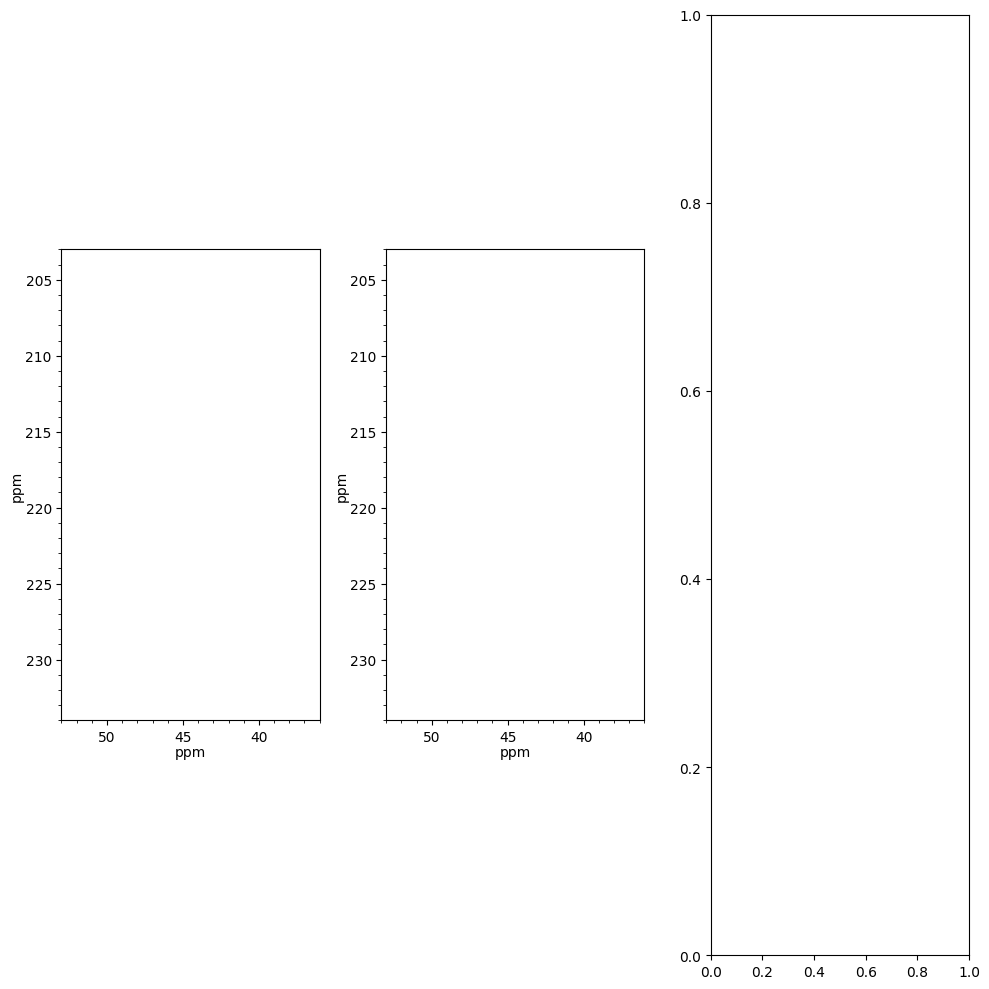

In [ ]:
def main(PDB_file, exp_file, output_file_path, aa):
  aa1 = aa
  data = []
  with open(PDB_file, mode="r") as infile: #open data file and read contents
    reader = csv.reader(infile, delimiter="\n")
    for row in reader:
      if len(row) == 1:
        data.append(re.split(r'\t', row[0])[2:])
      else:
        data.append(row)
  def get_row_floats(data, row):
    return list(map(lambda x: float(x[row]), data))
  phi = get_row_floats(data[1:], 0) #def z as CO shift
  psi = get_row_floats(data[1:], 1) #def w as N shift
  x = get_row_floats(data[1:], 2)
  y = get_row_floats(data[1:], 3)
  z = get_row_floats(data[1:], 4)
  w = get_row_floats(data[1:], 5)
  j = []
  #for i in range(len(x)):
    #j.append(x[i] + y[i])
  j = y
  data = []
  count = 0
  with open(exp_file, mode="r") as infile: #open data file and read contents
    reader = csv.reader(infile, delimiter="\n")
    for row in reader:
      if len(row) == 1:
        data.append(re.split(r'\s+', row[0])[1:])
      else:
        data.append(row)
  '''def get_row_floats(data, row):
    return list(map(lambda x: float(x[row]), data))'''
  ca_exp=[]
  inadequate=[]
  cb_exp=[]
  intensity=[]
  for i in range(len(data)):
    ca_exp.append(float(data[i-1][0])) #def x as Ca shift
    inadequate.append(float(data[i-1][1]))
    cb_exp.append(float(data[i-1][1])) #def y as Cb shift
    intensity.append(float(data[i-1][2]))

  min = np.min(intensity)
  for i in range(len(intensity)):
    intensity[i-1] = intensity[i-1]-min

  mask = np.logical_and(np.array(inadequate) >= 29, np.array(inadequate) <= 37)
  mask = np.logical_and(mask, np.array(ca_exp) >= 54)
  mask = np.logical_and(mask, np.array(ca_exp) <= 71)
  #mask = np.logical_and(mask, np.array(intensity) >= 0)

  #mask = np.logical_and(np.array(inadequate) >= 105, np.array(inadequate) <= 139)
  #mask = np.logical_and(mask, np.array(ca_exp) >= 50)
  #mask = np.logical_and(mask, np.array(ca_exp) <= 67)


  #print(sum(ca_exp*intensity)/sum(intensity))
  #print(sum(inadequate*intensity)/sum(intensity))
  #print(sum(x)/len(x))
  #print(sum(j)/len(j))

  atom_key={
            "ca":0,
            "cb":1,
            "co":2,
            "n":3,
          }

  nonCys_nonGly_aas={"A", "D", "E", "F", "H", "I", "K", "L", "M",
                    "N", "P", "Q", "R", "S", "T", "V", "Y", "W"}

  nonCys_aas={"A", "D", "E", "F", "G", "H", "I", "K", "L", "M",
              "N", "P", "Q", "R", "S", "T", "V", "Y", "W"}

  na=np.nan

  aa_spec_ranges={ #ranges of interest for chemical shifts
                  #aa1 Ca      Cb      C         N
                  # Ca & Cb adjusted to 17ppm to match Fig5
                  'A':[[44,61],[11,28],[170,184],[112,133]],
                  'R':[[47,64],[22,39],[169,183],[112,133]],
                  'N':[[44,61],[30,47],[168,182],[106,127]],
                  'D':[[45,62],[33,50],[169,183],[109,130]],
  #               'C':[[50,67],[22,39],[168,182],[105,126]],
                  'Q':[[47,64],[22,39],[169,183],[108,129]],
                  'E':[[49,66],[22,39],[169,183],[109,130]],
                  'G':[[36,53],[203,234],[167,181],[ 98,119]],
                  'H':[[49,66],[23,40],[168,182],[107,128]],
                  'I':[[54,71],[31,48],[168,182],[109,130]],
                  'L':[[45,62],[33,50],[170,184],[110,131]],
                  'K':[[49,66],[26,43],[169,183],[109,130]],
                  'M':[[47,64],[26,43],[169,183],[108,129]],
                  'F':[[50,67],[31,48],[168,182],[107,128]],
                  'P':[[57,74],[25,42],[170,184],[ na, na]],
                  'S':[[50,67],[105,139],[55,72],[167,181],[104,125]],
                  'T':[[54,71],[114,148],[60,77],[168,182],[102,123]],
                  'W':[[48,65],[21,38],[169,183],[109,130]],
                  'Y':[[50,67],[30,47],[168,182],[108,129]],
                  'V':[[54,71],[25,42],[169,183],[108,129]],
                  }


  aa_atom_groups={
                  'A':[['co','ca'],['ca','cb']],
  #               'C':[['co','ca'],['ca','cb']],
                  'D':[['co','ca'],['ca','cb']],
                  'E':[['co','ca'],['ca','cb']],
                  'F':[['co','ca'],['ca','cb']],
                  'G':[['co','ca']],
                  'H':[['co','ca'],['ca','cb']],
                  'I':[['co','ca'],['ca','cb']],
                  'K':[['co','ca'],['ca','cb']],
                  'L':[['co','ca'],['ca','cb']],
                  'M':[['co','ca'],['ca','cb']],
                  'N':[['co','ca'],['ca','cb']],
                  'P':[['co','ca'],['ca','cb']],
                  'Q':[['co','ca'],['ca','cb']],
                  'R':[['co','ca'],['ca','cb']],
                  'S':[['co','ca'],['ca','cb']],
                  'T':[['co','ca'],['ca','cb']],
                  'V':[['co','ca'],['ca','cb']],
                  'Y':[['co','ca'],['ca','cb']],
                  'W':[['co','ca'],['ca','cb']],
                }

  atom_a = "ca" #defining atom_a as the alpha carbon
  atom_b = "cb" #defining atom_b as the beta carbon
  aaX = aa1 #define aaX as residue of interest (one letter code)
  points = zip(atom_a, atom_b) #create an array with both atom_a and atom_b
  #above_diag = (filter(lambda i: i[0] > i[1], points)) #select only points above the diagonal due to mirroring


                            # figsize is in inches, modify for different size
  aaX = aa
  subplot_counter = 0
  #for subplot_counter, input_file in enumerate(input_file_paths):
      # also, extract amino acid information #
      # get the first letter of the input file - modify manually if necessary #
  aaX = aa1 #amino acid - easiest to modify manually
    #input_file.split("/")[-1][0] # modify this to get aa1 info
  ###################################
      ### AUTOMATIC PART FROM HERE ON ###
      # skip G and P when the specified atom/CS is not there
  atom_a = atom_a.lower(); atom_b = atom_b.lower()#

  CAs=[]; CBs=[]; COs=[]; Ns=[]

  # join CS of each atom into one list #
  if aa1 in nonCys_nonGly_aas:
          all_CS = [x, y, y, z]
  elif aa1 == 'G':
          all_CS = [x, j, y, w]
  elif aa1 == 'C':
          print('Skipping cysteine since PPM has no prediction for Cys.')
  else:
          print('Error: amino acid \"{}\" not implemented'.format(aa1))
          sys.exit()

        # set atom selection so that lower average(ppm) is first (x-axis) ...
        # ... which draws above peaks above the diagonal. Higher avgerage(ppm) ...
        # ... draws the peaks as peaks below the diagonal.



  x_key=atom_key[atom_a]
  y_key=atom_key[atom_b]
  #w = [1.198e+04,3.702e+04,3.702e+04,-5.846e+05,5.808e+05,-4.077e+04]
  bin_width=0.25
  mtick_spacing=5
  x_lims = np.array(aa_spec_ranges[aa1])
  y_lims = np.array(aa_spec_ranges[aa1][1])
  x_edges = np.arange(x_lims[0][0],x_lims[0][1]+bin_width,bin_width) #create an array from one limit to the next using bin widths
  y_edges=np.arange(y_lims[0],y_lims[1]+bin_width,bin_width)
  hw=bin_width/2
  center_bins_x=np.arange(x_lims[0][0]+hw,x_lims[0][1]+hw,bin_width)
  center_bins_y=np.arange(y_lims[0]+hw,y_lims[1]+hw,bin_width)



        # calculate counts for bins #
  H1, npxedges, npyedges = np.histogram2d(y, x,
                                          bins=(y_edges,x_edges))#, weights = [w[i]]*len(all_CS[y_key]),)
  #H2, npxedges, npyedges = np.histogram2d(all_CS[y_key],all_CS[2],bins=(y_edges,x_edges))#, weights = [w[i]]*len(all_CS[y_key]),)
        # set contouring parameters #
  #H = np.sum((H1,H2), axis=0)
  H = H1
  #print(H1.shape,H2.shape,H.shape)
        # set contouring parameters #
  #print(np.max(H))
  h_lists = []
  h = []

  fwhm = 2  # Full width at half maximum
  def gaussian2d(x, y, amplitude, xo, yo, fwhm):
    d = fwhm / (2 * np.sqrt(2 * np.log(2)))
    h_list = [0]*len(H)
    xgrid, ygrid = np.meshgrid(x, y)
    g = np.zeros_like(xgrid)
    for i in range(len(xo)-1):
        for j in range(len(yo)-1):
            a = 1/(2*d**2)
            c = 1/(2*d**2)
            xi = np.linspace(xo[i] - 3 * d, xo[i] + 3 * d, len(xo))
            yi = np.linspace(yo[j] - 3 * d, yo[j] + 3 * d, len(yo))
            xigrid, yigrid = np.meshgrid(xi, yi)
            gi = amplitude[i][j]*np.exp( - (a*((xigrid-xo[i])**2) + a*((yigrid-yo[j])**2)))
            H3, npxedges1, npyedges1 = np.histogram2d(yigrid.ravel(),xigrid.ravel(),bins=(npyedges,npxedges),weights = gi.ravel())
            h_list.append(H3)
            H3, npxedges1, npyedges1 = np.histogram2d(yigrid.ravel(),xigrid.ravel(),bins=(npyedges,npxedges),weights = gi.ravel())
            h_list.append(H3)
    h_lists.append(sum(h_list))
    h = sum(h_lists)
    return(h)
  Z = gaussian2d(npxedges[:-1], npyedges[:-1], H, npxedges[:-1], npyedges[:-1], 1.5)
  H_exp, npxedges_exp, npyedges_exp = np.histogram2d(inadequate, ca_exp, bins=(y_edges,x_edges), weights=intensity)
  h = Z


  c=[]
  d =[]


  print(np.shape(h))
  for i in range(len(h)):
    c = h[i-1]/sum(sum(h))
    d.append(c)
  H=np.array(d).T
  c=[]
  d =[]
  h_exp = H_exp
  for i in range(len(H_exp)):
    c = (H_exp[i-1])/sum(sum(H_exp))
    #c = (H_exp[i-1]*.005947148123664881)/(sum(sum(h_exp))*0.002560346648728901)
    #c = (H_exp[i-1]*0.007033550868176652)/(sum(sum(h_exp))*0.0022451602109917292 )
    d.append(c)
  H_exp=np.array(d)

  ###subtraction###
  h = np.subtract(H_exp,H)
  savetxt('urea - GLY',h,delimiter=',')

  #print(sum(sum(sum(H_exp*np.meshgrid(x_edges[1:],y_edges[1:])))/sum(sum(H_exp))))
  #print(sum(sum(sum(H*np.meshgrid(x_edges[1:],y_edges[1:])))/sum((sum(H)))))


  max_cont = np.max(H)
  #ensemble_size = len(all_CS[y_key])
  #factor size of 1.15
  #13steps
  min_cont = np.min(H) # ensemble_size/2000*(5units*bin_width)
  step = []
  for i in range(13):
    x = 1.15**i
    step.append(x)
  steps = sum(step)
  step_cont = np.subtract(max_cont,min_cont)/steps
  array = np.zeros(13)
  #print(max_cont,min_cont)
  for i in range(13):
    if i == 0:
      array[i] = (((1.15 ** i) * (step_cont))) + min_cont
    else:
      array[i] = (((1.15 ** i) * (step_cont))) + array[i-1]
  #print(array)
  levels = array
  min_cont = np.min(h) # ensemble_size/2000*(5units*bin_width)
  max_cont = np.max(h)
  #print(max_cont,min_cont)
  step = []
  for i in range(13):
    x = 1.15**i
    step.append(x)
  steps = sum(step)
  step_cont = np.subtract(max_cont,min_cont)/steps
  array = np.zeros(13)
  #print(max_cont,min_cont)
  for i in range(13):
    if i == 0:
      array[i] = (((1.15 ** i) * (step_cont))) + min_cont
    else:
      array[i] = (((1.15 ** i) * (step_cont))) + array[i-1]
  #print(array)
  levels = array
  subplot_counter = 0
        # draw the subplot #
  m = subplot_counter//fig_grid_shape[1]
  n = subplot_counter%fig_grid_shape[1]
  a = axs[0].contour(x_edges[:-1], y_edges[:-1], H_exp, levels = levels, cmap='RdBu',linewidths=0.5)
  b = axs[1].contour(x_edges[:-1], y_edges[:-1], H, levels = levels, cmap='copper',linewidths=0.5)
  c = axs[2].contour(x_edges[:-1], y_edges[:-1], h, levels = levels, cmap='RdBu',linewidths=0.5)
  #axs[m][n]
  #print(sum(sum(h)))

  for n in range(2):
    axs[n].set_aspect('equal')
    axs[n].set_xlim(x_lims[0][0],aa_spec_ranges[aa1][0][1])
    axs[n].set_ylim(y_lims[0],y_lims[1])
    axs[n].xaxis.set_major_locator(pltticker.MultipleLocator(mtick_spacing))
    axs[n].yaxis.set_major_locator(pltticker.MultipleLocator(mtick_spacing))
    axs[n].xaxis.set_minor_locator(pltticker.MultipleLocator(1))
    axs[n].yaxis.set_minor_locator(pltticker.MultipleLocator(1))
    axs[n].set_xlabel('ppm', labelpad=1.0)
    axs[n].set_ylabel('ppm', labelpad=1.0)
    axs[n].invert_xaxis()
    axs[n].invert_yaxis()

  #cbar = plt.colorbar(c)

  if aaX in nonCys_aas:
          inside_title=one2three[aa1].upper()
  elif aaX == "X":
          inside_title="ALA-PRO"
  elif aaX == "Z":
          inside_title="PRO-PRO"
  else:
          print("Error [{}]: unknown single letter amino acid code "
                "(or it was a Cys).".format(aaX))
  axs[m][n].text(0.95, 0.85, "{}".format(inside_title), ha="right", transform=axs[m][n].transAxes)


  plt.savefig("valine monomer.")
  print("Plotted: {}")#.format(output_filename))

from seaborn.widgets import color_palette

fig_grid_shape=(1,3) # modify for different grid arrangement of subplots
fig, axs = plt.subplots(fig_grid_shape[0],fig_grid_shape[1], figsize=(10,10), tight_layout=True)

inputs = "G_10K.out,230703_GLY_INADEQUATE_8M_Urea.txt,out,G"
inputs = inputs.split(',')
PDB_file = inputs[0]
exp_file = inputs[1]
output_file_path = inputs[2]
aa = inputs[3]
main(PDB_file, exp_file, output_file_path, aa)

Enter the file path, subplot number, and amino acid, separated by commas, or 'Z' to quit: 


UFuncTypeError: ignored

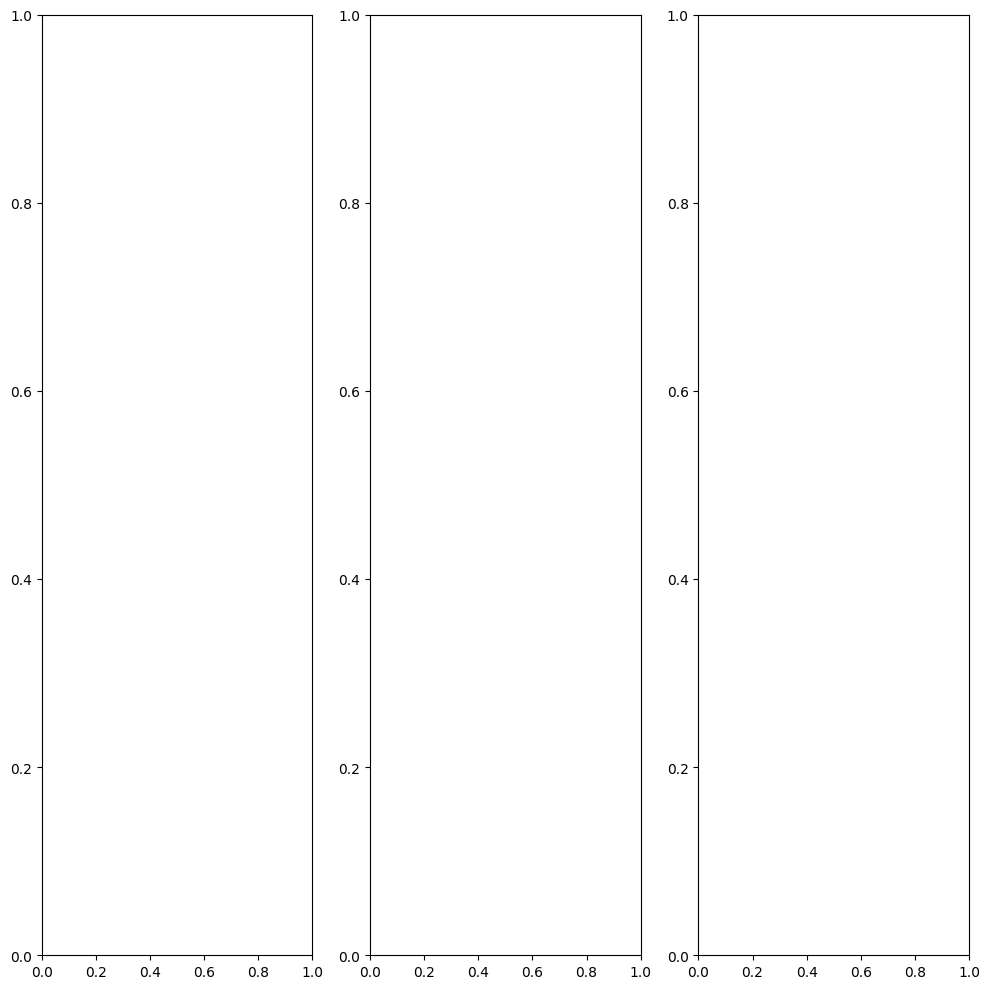

In [ ]:
from seaborn.widgets import color_palette

fig_grid_shape=(1,3) # modify for different grid arrangement of subplots
fig, axs = plt.subplots(fig_grid_shape[0],fig_grid_shape[1], figsize=(10,10), tight_layout=True)

print("Enter the file path, subplot number, and amino acid, separated by commas, or \'Z\' to quit: ")
quit = False


print("Enter the file path for AA, file path for experimental data, subplot number, and amino acid, separated by commas, or \'Z\' to quit: ")



In [ ]:
while not quit:
  inputs = input()
  if inputs.upper() == 'Z':
    quit = True
  else:
    inputs = inputs.split(',')
    PDB_file = inputs[0]
    exp_file = inputs[1]
    output_file_path = inputs[2]
    aa = inputs[3]
    main(PDB_file, exp_file, output_file_path, aa)
    print("Enter the file path for AA, file path for experimental data, subplot number, and amino acid, separated by commas, or \'Z\' to quit: ")

FileNotFoundError: ignored

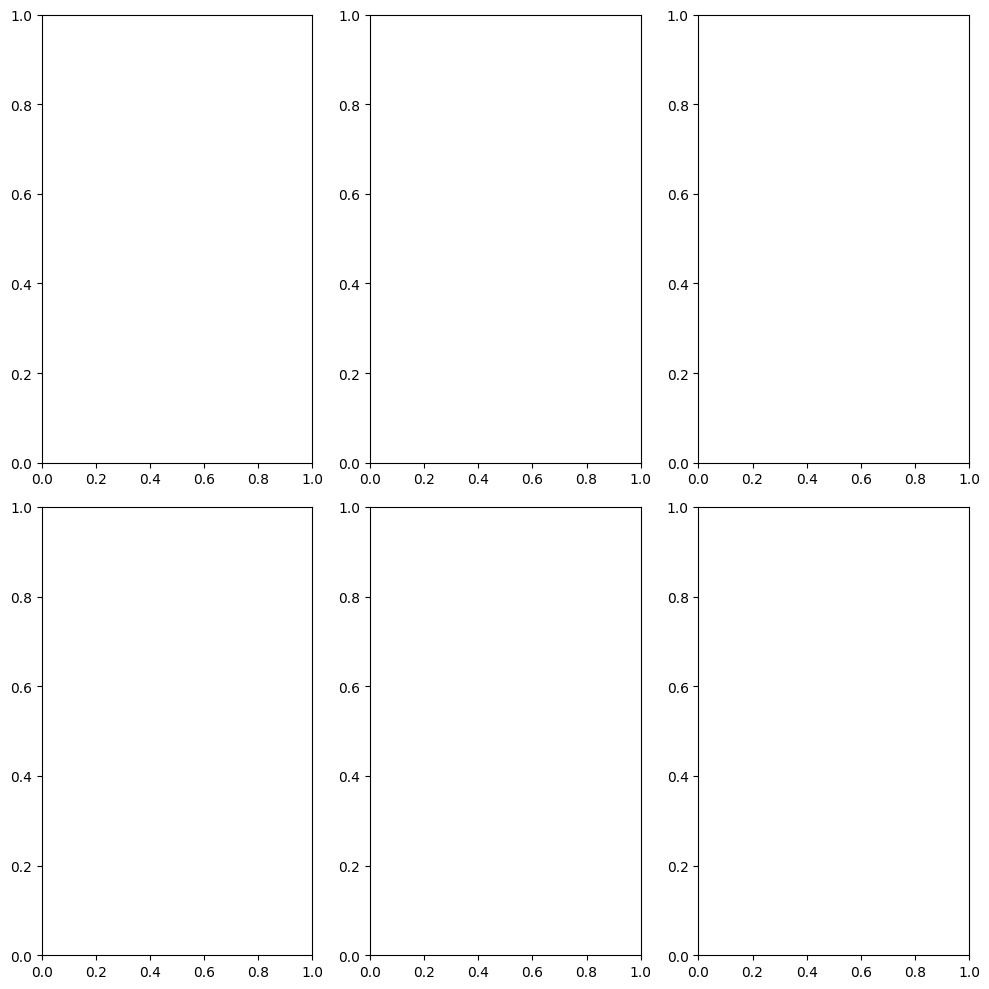

In [ ]:
aa_spec_ranges={ #ranges of interest for chemical shifts
                  #aa1 Ca      Cb      C         N
                  # Ca & Cb adjusted to 17ppm to match Fig5
                  'A':[[11,28],[55,89],[44,61],[170,184],[112,133]],
                  'R':[[47,64],[22,39],[169,183],[112,133]],
                  'N':[[44,61],[30,47],[168,182],[106,127]],
                  'D':[[45,62],[33,50],[169,183],[109,130]],
  #               'C':[[50,67],[22,39],[168,182],[105,126]],
                  'Q':[[47,64],[22,39],[169,183],[108,129]],
                  'E':[[49,66],[22,39],[169,183],[109,130]],
                #  'G':[[36,53],[na,na],[167,181],[ 98,119]],
                  'H':[[49,66],[23,40],[168,182],[107,128]],
                  'I':[[54,71],[31,48],[168,182],[109,130]],
                  'L':[[45,62],[33,50],[170,184],[110,131]],
                  'K':[[49,66],[26,43],[169,183],[109,130]],
                  'M':[[47,64],[26,43],[169,183],[108,129]],
                  'F':[[50,67],[31,48],[168,182],[107,128]],
             #     'P':[[57,74],[25,42],[170,184],[ na, na]],
                  'S':[[50,67],[105,139],[55,72],[167,181],[104,125]],
                  'T':[[54,71],[114,148],[60,77],[168,182],[102,123]],
                  'W':[[48,65],[21,38],[169,183],[109,130]],
                  'Y':[[50,67],[30,47],[168,182],[108,129]],
                  'V':[[54,71],[25,42],[169,183],[108,129]],
                  }
aa1 = 'S'
fig_grid_shape=(2,3) # modify for different grid arrangement of subplots
fig, axs = plt.subplots(fig_grid_shape[0],fig_grid_shape[1], figsize=(10,10), tight_layout=True)
bin_width=0.25
mtick_spacing=5
x_lims = np.array(aa_spec_ranges[aa1])
y_lims = np.array(aa_spec_ranges[aa1][1])
x_edges = np.arange(x_lims[0][0],x_lims[2][1]+bin_width,bin_width) #create an array from one limit to the next using bin widths
y_edges=np.arange(y_lims[0],y_lims[1]+bin_width,bin_width)
hw=bin_width/2
center_bins_x=np.arange(x_lims[0][0]+hw,x_lims[2][1]+hw,bin_width)
center_bins_y=np.arange(y_lims[0]+hw,y_lims[1]+hw,bin_width)

sf=np.genfromtxt('urea', delimiter=',')
ff=np.genfromtxt('no urea 2', delimiter=',')

m=0
n=0
h=np.subtract(ff,sf)
max_cont = np.max(h)
ensemble_size = len(h)
#factor size of 1.15
#13steps
min_cont = np.min(h) # ensemble_size/2000*(5units*bin_width)
print(max_cont,min_cont)
step = []
for i in range(13):
  x = 1.15**i
  step.append(x)
steps = sum(step)
step_cont = max_cont/steps
array = np.zeros(13)

for i in range(13):
  array[i] = ((1.15 ** i) * (step_cont)) + array[i-1]
print(array)
levels = array
c = axs[m][n].contour(x_edges[:-1], y_edges[:-1], h, levels = levels, cmap='copper',linewidths=0.5)

axs[m][n].set_aspect('equal')
axs[m][n].set_xlim(x_lims[0][0],aa_spec_ranges[aa1][2][1])
axs[m][n].set_ylim(y_lims[0],y_lims[1])
axs[m][n].xaxis.set_major_locator(pltticker.MultipleLocator(mtick_spacing))
axs[m][n].yaxis.set_major_locator(pltticker.MultipleLocator(mtick_spacing))
axs[m][n].xaxis.set_minor_locator(pltticker.MultipleLocator(1))
axs[m][n].yaxis.set_minor_locator(pltticker.MultipleLocator(1))
axs[m][n].set_xlabel('ppm', labelpad=1.0)
axs[m][n].set_ylabel('ppm', labelpad=1.0)
axs[m][n].invert_xaxis()
axs[m][n].invert_yaxis()
